In [226]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Arrays for storing temperatures, function values, iterations, and states
temperatures = []
function_values = []
iterations = []
states = []

np.random.seed(42)
# Initial parameters
L_0 =550 # Fixed Markov chain length

# Define the Ackley 2 function
def ackley2(x, y):
    return -200 * math.exp(-0.02 * math.sqrt(x**2 + y**2))

def simulate(temp, func, bounds):
    current_x = random.uniform(bounds[0], bounds[1])
    current_y = random.uniform(bounds[0], bounds[1])
    best_solution = (current_x, current_y)
    best_value = func(current_x, current_y)
    L_i = L_0

    data_dimensions = 3
    simulation_data = np.empty((2000, L_0, data_dimensions))

    for i in range(2000):
        for j in range(L_i):
            new_x = random.uniform(bounds[0], bounds[1])
            new_y = random.uniform(bounds[0], bounds[1])
            delta_E = func(new_x, new_y) - func(current_x, current_y)

            if delta_E <= 0 or random.uniform(0, 1) < math.exp(-delta_E / temp):
                current_x = new_x
                current_y = new_y

            current_value = func(current_x, current_y)

            simulation_data[i, j, 0] = temp
            simulation_data[i, j, 1] = j
            simulation_data[i, j, 2] = func(current_x, current_y)

        best_solution = (current_x,current_y)
        best_value = func(current_x,current_y)

        states.append(best_solution)
        function_values.append(best_value)
        temperatures.append(temp)
        iterations.append(i)

        # Decrease the temperature
        temp *= 0.95

    return best_solution, best_value, states, function_values, temperatures, iterations, simulation_data




In [227]:
## Example usage
temp =200 # Initial temperature
bounds = (-32, 32)  # Bounds for the Ackley function
best_solution, best_value, states, function_values, temperatures, iterations, simulation_data = simulate(temp, ackley2, bounds)

print(f"Best Solution: {best_solution}")
print(f"Best Value: {best_value}")



Best Solution: (-0.018520097161811577, -0.029790076534972343)
Best Value: -199.85973854180907


In [228]:
target_temp = 10
closest_iteration = np.argmin(np.abs(np.array(temperatures) - target_temp))

In [229]:
function_values_for_temp = simulation_data[closest_iteration, :, 2]

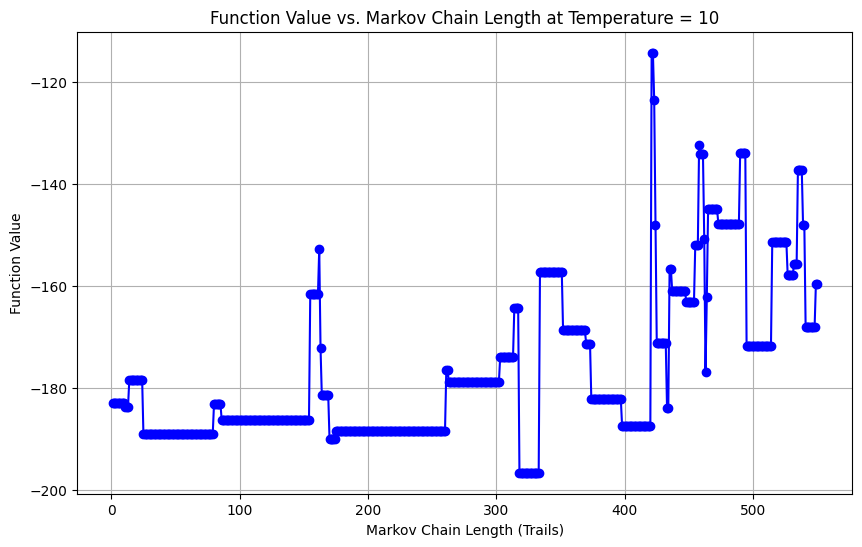

In [230]:
# Plot the function values vs. Markov chain length (1 to 50 trails)
plt.figure(figsize=(10, 6))
plt.plot(range(1, L_0 + 1), function_values_for_temp, marker='o', linestyle='-', color='b')
plt.xlabel('Markov Chain Length (Trails)')
plt.ylabel('Function Value')
plt.title('Function Value vs. Markov Chain Length at Temperature = 10')
plt.grid(True)
plt.show()

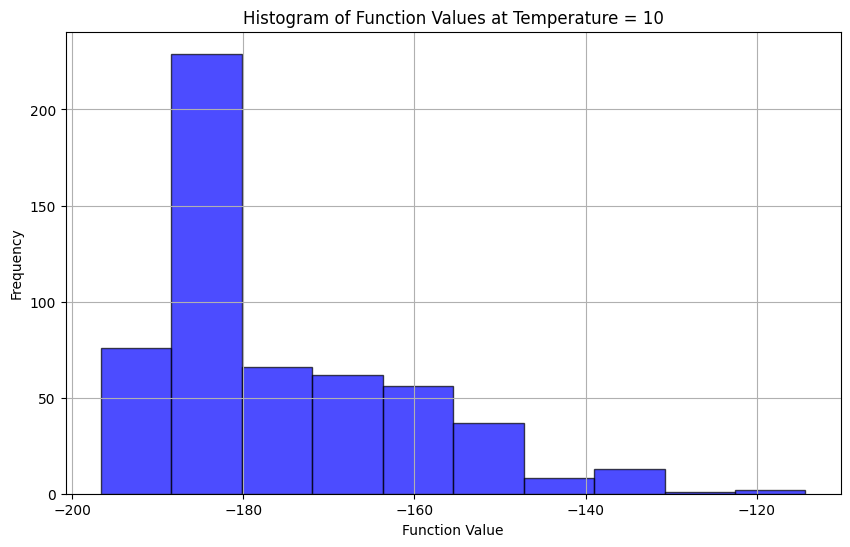

In [231]:
plt.figure(figsize=(10, 6))
plt.hist(function_values_for_temp, bins=10, edgecolor='black', color='blue', alpha=0.7)
plt.xlabel('Function Value')
plt.ylabel('Frequency')
plt.title('Histogram of Function Values at Temperature = 10')
plt.grid(True)
plt.show()

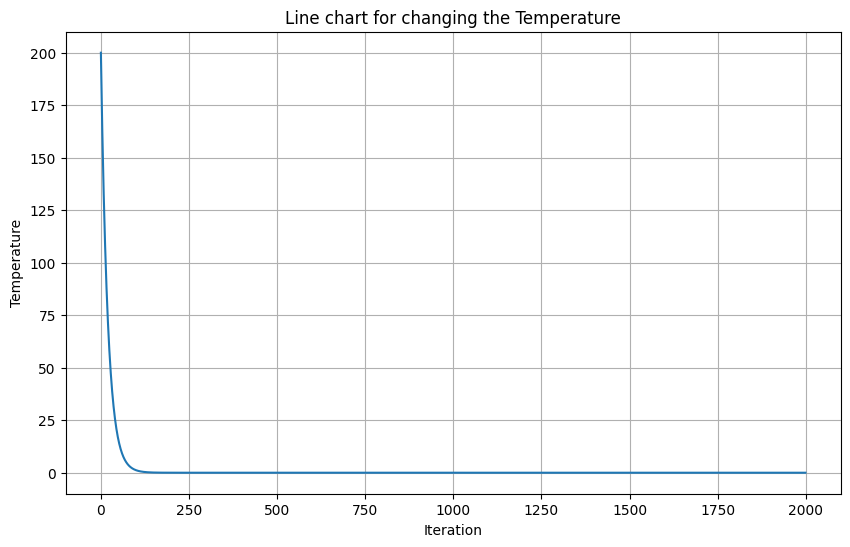

In [232]:
# Draw the plot for temperature vs iteration
plt.figure(figsize = (10,6))
plt.plot(iterations,temperatures)
plt.title("Line chart for changing the Temperature")
plt.xlabel("Iteration")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()